In [20]:
import yfinance as yf
import pandas as pd
import numpy as np

In [60]:
price = yf.download('IGE', start = '2001-11-16', end='2007-11-15')
#price.sort_index(inplace=True)
dailyret = price.loc[:, 'Adj Close'].pct_change()
excessret = dailyret - .04/252
sharpeRatio = np.sqrt(252)*np.mean(excessret) / np.std(excessret)
sharpeRatio

priceSPY = yf.download('SPY', start = '2001-11-16', end='2007-11-15')
retSPY = priceSPY.loc[:, 'Adj Close'].pct_change()

strategy_return = (dailyret - retSPY)/2
sharpe = np.sqrt(252)*np.mean(strategy_return)/np.std(strategy_return)
sharpe

strategy_return.dropna(inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [81]:
def calculateMaxDD(cumret):
# ======================================================
# calculation of maximum drawdown and maximum drawdown
# duration based on
# cumulative COMPOUNDED returns. cumret must be a com-
# pounded cumulative return.
# i is the index of the day with maxDD.
# ======================================================
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1],
        cumret[t])
        drawdown[t]=(1+cumret[t])/(1+highwatermark[t])-1
        
        if drawdown[t]==0.0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
        
    maxDD, i = np.min(drawdown), np.argmin(drawdown) #drawdown < 0 always
    
    maxDDD = np.max(drawdownduration)
    print(drawdownduration)
    return maxDD, maxDDD, i, drawdownduration

cumret = np.cumprod(1 + strategy_return) - 1
maxDrawdown, maxDrawdownDuration, startDrawdownDay, ddd= calculateMaxDD(cumret.values)

maxDrawdownDuration


[0. 0. 1. ... 2. 3. 4.]


498.0

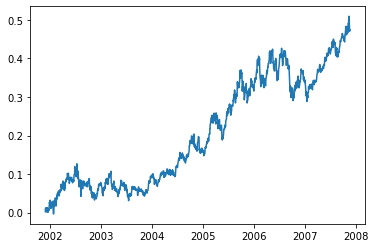

In [80]:
from matplotlib import pyplot as plt
plt.plot(cumret)